In [ ]:
# See this ref: https://github.com/soumith/ganhacks

### [Wasserstein GAN](https://arxiv.org/abs/1701.07875) also apparently stabilizes training, [Chen lecture 10](https://www.youtube.com/watch?v=OmMRqmNJOOU)

# Unconditional GAN trained on Fashion MNIST

In [1]:
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 28

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

In [2]:
import datahelper as dh
import importlib
importlib.reload(dh)

/home/nashir/miniconda3/envs/cap5516-final/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'datahelper' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/datahelper.py'>

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

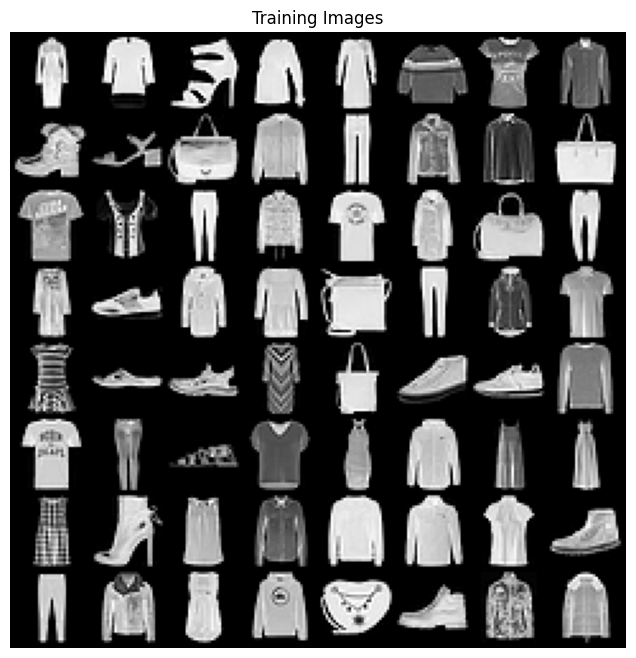

In [4]:
# Load fashion mnist dataloader
dataloader = dh.load_fashion_mnist_from_torch(batch_size)

# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Deep Convolutional GAN

In [5]:
import dcgan

In [6]:
# Create the generator
netG = dcgan.Generator(nz, ngf, nc).to(device)

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(dcgan.weights_init)

# Print the model
print(netG)

Generator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [7]:
import importlib
importlib.reload(dcgan)

<module 'gan' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/gan.py'>

In [8]:
# Create the Discriminator
netD = dcgan.Discriminator(nc, ndf).to(device)

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(dcgan.weights_init)

# Print the model
print(netD)

Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [9]:
import torch.nn as nn
import torch.optim as optim

In [10]:
# Initialize BCELoss function
criterion = nn.BCELoss()

n_samples = 64

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(n_samples, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [11]:
img_list = []
G_losses = []
D_losses = []

In [12]:
importlib.reload(dcgan)

<module 'gan' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/gan.py'>

In [13]:
dcgan.train_unconditional_gan(
    num_epochs, dataloader, device, nz, netG, netD, criterion, optimizerD, optimizerG,
    real_label, fake_label, fixed_noise, img_list, G_losses, D_losses)

Starting Training Loop...


RuntimeError: Calculated padded input size per channel: (1 x 1). Kernel size: (4 x 4). Kernel size can't be greater than actual input size

# Vanilla GAN

# [Conditional GAN](https://arxiv.org/pdf/1411.1784.pdf) on Fashion MNIST